
# **Image Classification (Cats vs Dogs)**
 ## Part 1 - Convolutional Neural Networks (CNNs)

![](./woof_meow.jpg)

The main aim of this project is to Distinguish images of dogs from cats as follows.

Dataset to downloaded from the below link https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data

Four key components of any DL model includes:

1) Data (Images)

2) Model e.g. Convolutional Neural Networks (CNNs)

3) Loss (Cross Entropy)

4) Optimization (SGD, Adam, ..)


# Import libraries

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import glob
import math
import zipfile
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from PIL import Image

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# Preparing Train and TestData 
(Converting Zip data and getting images' names)

In [2]:
# Input data files are available in the read-only "../input/" directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        temp_dir=os.path.join(dirname, filename)
        if "train" in temp_dir or "test" in temp_dir:
            print(temp_dir)
            with zipfile.ZipFile(temp_dir,"r") as z:
                 z.extractall(".")
                    
DATA_DIR = "/kaggle/working/"
trn_dir = f'{DATA_DIR}train'
tst_dir = f'{DATA_DIR}test'

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip


In [3]:
## getting all the trian and test data names
trn_fnames = glob.glob(f'{trn_dir}/*.*')
tst_fnames = glob.glob(f'{tst_dir}/*.*')
trn_fnames[:5]

['/kaggle/working/train/cat.10835.jpg',
 '/kaggle/working/train/dog.10634.jpg',
 '/kaggle/working/train/dog.6452.jpg',
 '/kaggle/working/train/cat.9230.jpg',
 '/kaggle/working/train/dog.8758.jpg']

## Showing a random sample image

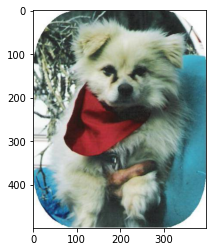

In [4]:
rand_number = random.randint(0,len(trn_fnames))
img = plt.imread(trn_fnames[rand_number])
plt.imshow(img)

## Create Train dataset

In [5]:
size=80

def  create_trainData(path):
    X = []
    y = []
    convert = lambda category : int(category == 'dog')
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p))
        new_img_array = cv2.resize(img_array, dsize=(size,size))
        X.append(new_img_array)
        y.append(category)
    return X, y

X_train,y_train = create_trainData(trn_dir)

In [6]:
X_train = np.array(X_train).reshape(-1, size,size,3)
y_train = np.array(y_train)
X_train.shape

(25000, 80, 80, 3)

# Normalize data

In [7]:
X_train = X_train / 255.0

# Determining Validation data

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

# Defining model, compliling, and fitting

In [9]:
in_sh = X_train.shape[1:]

model = keras.Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = in_sh))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1327168   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=10,validation_data=(X_val,y_val))

Epoch 1/20
1675/1675 [==============================] - 17s 8ms/step - loss: 0.6542 - accuracy: 0.6083 - val_loss: 0.5277 - val_accuracy: 0.7434
Epoch 2/20
1675/1675 [==============================] - 12s 7ms/step - loss: 0.5012 - accuracy: 0.7602 - val_loss: 0.4768 - val_accuracy: 0.7713
Epoch 3/20
1675/1675 [==============================] - 12s 7ms/step - loss: 0.4257 - accuracy: 0.8046 - val_loss: 0.4871 - val_accuracy: 0.7608
Epoch 4/20
1675/1675 [==============================] - 12s 7ms/step - loss: 0.3607 - accuracy: 0.8423 - val_loss: 0.5079 - val_accuracy: 0.7670
Epoch 5/20
1675/1675 [==============================] - 12s 7ms/step - loss: 0.2987 - accuracy: 0.8714 - val_loss: 0.4782 - val_accuracy: 0.7861
Epoch 6/20
1675/1675 [==============================] - 12s 7ms/step - loss: 0.2287 - accuracy: 0.9062 - val_loss: 0.5936 - val_accuracy: 0.7806
Epoch 7/20
1675/1675 [==============================] - 12s 7ms/step - loss: 0.1621 - accuracy: 0.9355 - val_loss: 0.6409 - val_ac

# Evaluation

In [12]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Train: loss = %.2f' % (loss*100),'   Accuracy = %.2f' % (accuracy*100))

loss, accuracy = model.evaluate(X_val, y_val)
print('validation: loss = %.2f' % (loss*100),'   Accuracy = %.2f' % (accuracy*100))

print("***************************************************************************************")

524/524 [==============================] - 6s 11ms/step - loss: 0.0204 - accuracy: 0.9928
Train: loss = 2.04    Accuracy = 99.28
258/258 [==============================] - 3s 11ms/step - loss: 1.8377 - accuracy: 0.7624
validation: loss = 183.77    Accuracy = 76.24
***************************************************************************************


# Evaluating one sample data

Actual class    =   cat
Predicted class =   dog


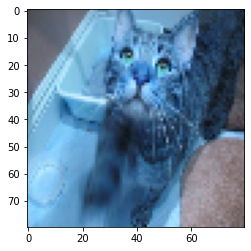

In [13]:
def get_label(x):
    return "dog" if x else "cat"

rand_number = random.randint(0,len(X_val))
img=X_val[rand_number]

plt.imshow(img)

predicted_class=model.predict(img.reshape(-1,80,80,3))

print("Actual class    =  ",get_label(y_val[rand_number]))
print("Predicted class =  ", get_label(np.round(predicted_class)))


# Saving weights and models

In [14]:
# model.save_weights('model_wieghts.h5')
# model.save('model_keras.h5')

# Preparing submission solution on test data 

In [ ]:
size=80

def  create_testData(path):
    X = []
    for p in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,p))
        new_img_array = cv2.resize(img_array, dsize=(size,size))
        X.append(new_img_array)
    return X, y

X_test,y_train = create_testData(tst_dir)
X_test = np.array(X_test).reshape(-1, size,size,3)
X_test  = X_test  / 255.0

y_test=model.predict(X_test,verbose=1)
y_test=y_test.reshape(-1)

df_test=pd.DataFrame({'id':range(1,len(y_test)+1),'label':y_test})
# df_test.to_csv('solution1.csv',index=False)